In [1]:
#Get the adj close for a portfolio consisting of Apple and AMZN beginning 2010 to current 
#normalize the dat to make a comparison between the securties i nthe portfolio
#calculate the simple daily return for the portfolio 
#calculate the Volitility forthe portfolio  assuming the portfolio is equally weighted
#calculate the total return for the portfolio 
#calculate when the return for the  potrfolio profvided a negative return 
#perform a coorelation analysis for the portfilio 
#perform a linear regression analysis on the portfolio and plot  the regression line 
#isther any predicitve analysis that can be determind for this portfolo->
#what are the pros and cons of the portfolio
#add the returns to the data frame

In [2]:
import pandas as pd 
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [3]:
#1
tickers = ["AMZN", "AAPL"]
df = pd.DataFrame()
for t in tickers: 
    df[t] = wb.DataReader(t, "yahoo", start = "2010-1-1")["Adj Close"]

In [4]:
df

,AMZN,AAPL
Date,,
2010-01-04,133.899994,26.601469
2010-01-05,134.690002,26.647457
2010-01-06,132.250000,26.223597
2010-01-07,130.000000,26.175119
2010-01-08,133.520004,26.349140
...,...,...
2019-12-10,1739.209961,268.480011
2019-12-11,1748.719971,270.769989
2019-12-12,1760.329956,271.459991


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2506 entries, 2010-01-04 to 2019-12-16
Data columns (total 2 columns):
AMZN    2506 non-null float64
AAPL    2506 non-null float64
dtypes: float64(2)
memory usage: 58.7 KB


In [6]:
df.columns

Index(['AMZN', 'AAPL'], dtype='object')

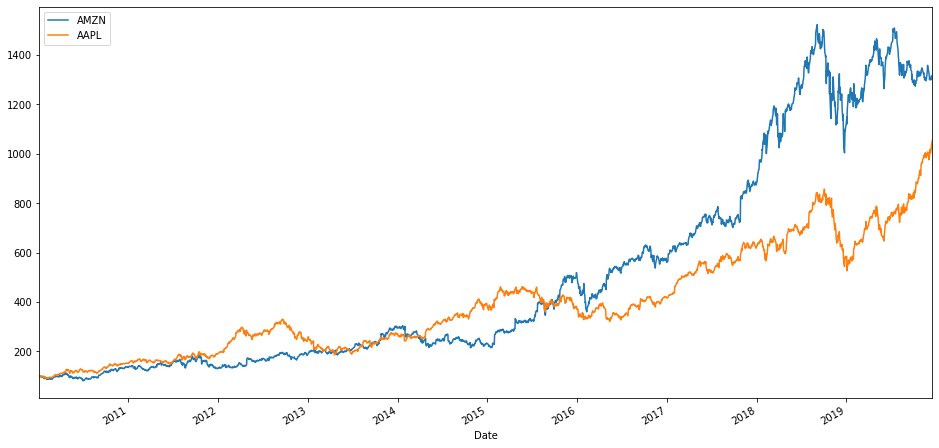

In [7]:
#2 -> Normalize the data 
(df/df.iloc[0] * 100).plot(figsize = (16,8))

In [8]:
#2 -> simple daily returns 
simple_returns = (df/df.shift(1)) -1

In [9]:
simple_returns.dropna()

,AMZN,AAPL
Date,,
2010-01-05,0.005900,0.001729
2010-01-06,-0.018116,-0.015906
2010-01-07,-0.017013,-0.001849
2010-01-08,0.027077,0.006648
2010-01-11,-0.024041,-0.008821
...,...,...
2019-12-10,-0.005887,0.005844
2019-12-11,0.005468,0.008529
2019-12-12,0.006639,0.002548


In [10]:
#volitility of the portfolio 
weights = np.array([0.5,0.5])
port_variance = np.dot(weights.T, np.dot(simple_returns.cov() * 250, weights))
port_volatility = port_variance ** 0.5
print(f"The volatility of the portfolio is {round(port_volatility, 3)* 100} %")

The volatility of the portfolio is 23.7 %


In [11]:
#Total return for the portfolio for the given period 
annual_return = simple_returns.mean() * 250
total_return = np.dot(weights, annual_return)
print(f"The total return for the portfolio for the period is {round(total_return, 2)*100}%")

The total return for the portfolio for the period is 28.999999999999996%


In [12]:
#calculate when the portfolio generated a negative return and plot these periods.Find out when each 
#security performed the the worst and wat year . Research why 
loss_returns = simple_returns[(simple_returns["AMZN"] < 0) & (simple_returns["AAPL"] < 0)]

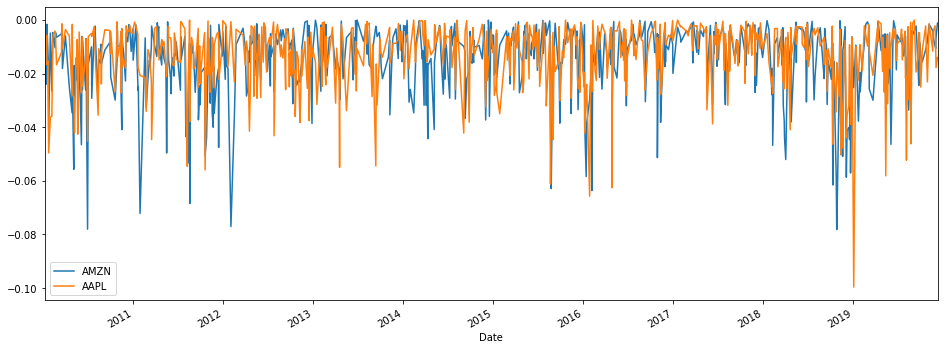

In [13]:
loss_returns.plot(figsize = (16,6))
plt.show()

In [14]:
#coorelation analysis -> generate a coorelation Matrix 
simple_returns.corr()

,AMZN,AAPL
AMZN,1.000000,0.397005
AAPL,0.397005,1.000000


In [ ]:
#Apple has a 39% correlation to amazon 

In [15]:
simple_returns.cov() * 250

,AMZN,AAPL
AMZN,0.095360,0.031489
AAPL,0.031489,0.065972


In [16]:
# Run a linear regression analysis between AApl and Amzn 
from scipy import stats
import statsmodels.api as sm

In [19]:
#generate the data to plot 
x_constant = sm.add_constant(df["AAPL"])
model = sm.OLS(df["AMZN"], x_constant).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AMZN   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                 1.963e+04
Date:                Mon, 16 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:59:45   Log-Likelihood:                -16758.
No. Observations:                2506   AIC:                         3.352e+04
Df Residuals:                    2504   BIC:                         3.353e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -320.9096      8.077    -39.730      0.000    -336.749    -305.071
AAPL           9.6050      0.069    140.090      0.000       9.471       9.739
==============================================================================
Omnibus:                       32.947   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.067
Skew:                          -0.283   Prob(JB):                     4.00e-08
Kurtosis:                       2.926   Cond. No.                         245.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
regressionLine = model.predict()
regressionLine

array([ -65.40311912,  -64.9614047 ,  -69.03257496, ..., 2286.4570226 ,
       2321.89940615, 2370.59670296])

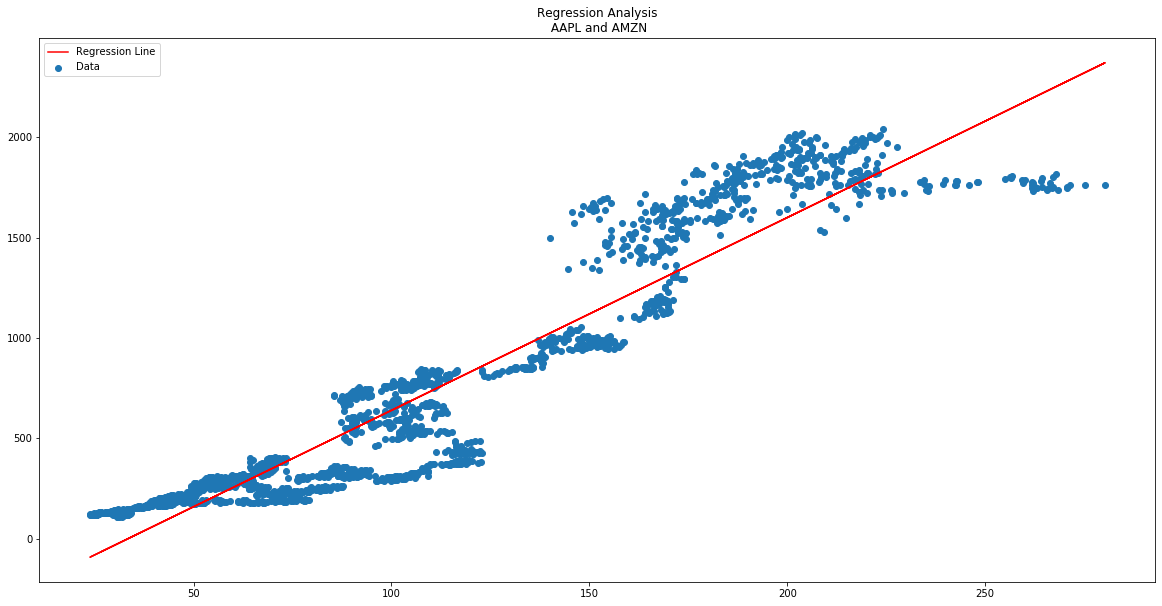

In [40]:
#plot a scatter graph to observe the correlation 
plt.figure(figsize=(20,10))
plt.scatter(df["AAPL"], df["AMZN"], label = "Data")
plt.plot(df["AAPL"], regressionLine, label = "Regression Line", color = "r")
plt.title("Regression Analysis\n AAPL and AMZN")
plt.legend()
plt.show()

In [41]:
regression_summary = stats.linregress(df["AAPL"], df["AMZN"])

In [42]:
regression_summary

LinregressResult(slope=9.604975634607412, intercept=-320.90958109211533, rvalue=0.9417252501525947, pvalue=0.0, stderr=0.06856286992730404)

In [46]:
print(f"The slope of the regression line is {regression_summary.slope}, with an intersept of {regression_summary.intercept}. The R_Value is {regression_summary.rvalue} and\n R_Squared is {regression_summary.rvalue ** 2}, with a standard deviation os {regression_summary.stderr}")

The slope of the regression line is 9.604975634607412, with an intersept of -320.90958109211533. The R_Value is 0.9417252501525947 and
 R_Squared is 0.886846446774967, with a standard deviation os 0.06856286992730404


The regression analysis shows that 88% of Amazons earnings can be explained by Apple. The risk for this is that because these to securties have a high r_squared value the portfolio cannt benefit from the diversificaitoin effect. 

In [62]:
df[["AMZN Returns", "AAPL Returns"]] = simple_returns

In [63]:
df

,AMZN,AAPL,AMZN Returns,AAPl Returns,AAPL Returns
Date,,,,,
2010-01-04,133.899994,26.601469,NaN,NaN,NaN
2010-01-05,134.690002,26.647457,0.005900,0.001729,0.001729
2010-01-06,132.250000,26.223597,-0.018116,-0.015906,-0.015906
2010-01-07,130.000000,26.175119,-0.017013,-0.001849,-0.001849
2010-01-08,133.520004,26.349140,0.027077,0.006648,0.006648
...,...,...,...,...,...
2019-12-10,1739.209961,268.480011,-0.005887,0.005844,0.005844
2019-12-11,1748.719971,270.769989,0.005468,0.008529,0.008529
2019-12-12,1760.329956,271.459991,0.006639,0.002548,0.002548


In [64]:
# fill nan values for first line on returns 
df["AMZN Returns"].fillna(0.00, inplace = True)
df["AAPL Returns"].fillna(0.00, inplace = True)

In [66]:
df.drop("AAPl Returns", inplace = True, axis=1)

In [72]:
df["SLOPE"] = regressionLine

In [77]:
df["Regression Line"] = regressionLine

In [80]:
df.drop("Regression Slope", inplace = True, axis=1)

In [99]:
df

,AMZN,AAPL,AMZN Returns,AAPL Returns,Regression Line
Date,,,,,
2010-01-04,133.899994,26.601469,0.000000,0.000000,-65.403119
2010-01-05,134.690002,26.647457,0.005900,0.001729,-64.961405
2010-01-06,132.250000,26.223597,-0.018116,-0.015906,-69.032575
2010-01-07,130.000000,26.175119,-0.017013,-0.001849,-69.498197
2010-01-08,133.520004,26.349140,0.027077,0.006648,-67.826732
...,...,...,...,...,...
2019-12-10,1739.209961,268.480011,-0.005887,0.005844,2257.834383
2019-12-11,1748.719971,270.769989,0.005468,0.008529,2279.829566
2019-12-12,1760.329956,271.459991,0.006639,0.002548,2286.457023
